<a href="https://colab.research.google.com/github/jyma14/PracticasComputacionII/blob/main/ProyectoUnidad3_regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicción de acidez en suelos para agricultura

Regresión linear para la correlación entre variables

In [ ]:
from sklearn.linear_model import LinearRegression
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
#import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Base de datos
db_tieraV = pd.read_csv('/content/DB_1.csv')
db_tieraV 
# Variables numéricas
#db_tierraV = db_tieraV.select_dtypes(include=['float64', 'int'])

,Unnamed: 0,Date,Time,Ph,Water Level,Temperature,Humidity,Water Pump ON/OFF
0,0,05-03-2020,10:51:46,8.37,4,44.80,40,ON
1,1,05-03-2020,10:52:16,8.05,7,44.80,40,ON
2,2,05-03-2020,10:52:43,7.58,13,44.80,40,ON
3,3,05-03-2020,10:53:09,7.20,19,45.20,40,ON
4,4,05-03-2020,10:53:39,6.50,21,45.20,40,ON
5,5,05-03-2020,10:54:01,6.34,27,45.20,40,OFF
6,6,05-03-2020,11:55:20,7.89,9,49.15,38,ON
7,7,05-03-2020,11:55:30,7.40,15,49.15,38,ON
8,8,05-03-2020,11:55:40,7.18,19,49.15,38,ON
9,9,05-03-2020,11:56:00,6.67,24,49.15,38,ON


In [ ]:
db_tieraV.columns=['Unnamed: 0','Date', 'Time', 'Ph', 'Water Level', 'Temperature',
       'Humidity ', 'Water Pump ON/OFF']
db_tieraV.iloc[:, [3,5]]

,Ph,Temperature
0,8.37,44.80
1,8.05,44.80
2,7.58,44.80
3,7.20,45.20
4,6.50,45.20
5,6.34,45.20
6,7.89,49.15
7,7.40,49.15
8,7.18,49.15
9,6.67,49.15


In [ ]:
# Matriz de correlación
corr_matrix = db_tieraV.corr(method='pearson')
corr_matrix

,Unnamed: 0,Ph,Water Level,Temperature,Humidity
Unnamed: 0,1.000000,-0.356399,0.424621,-0.158081,0.211770
Ph,-0.356399,1.000000,-0.950616,-0.151955,0.158994
Water Level,0.424621,-0.950616,1.000000,0.144956,-0.132948
Temperature,-0.158081,-0.151955,0.144956,1.000000,-0.971305
Humidity,0.211770,0.158994,-0.132948,-0.971305,1.000000


In [ ]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

NameError: ignored

In [ ]:
# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

**Regresión polinomial por mínimos cuadrados para prediccción de acidez en suelos para la agricultura**

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sympy import *
#Lectura de la base de datos de pH.
bd_pH = pd.read_csv("/content/DB_1.csv")
bd_pH

,Unnamed: 0,Date,Time,Ph,Water Level,Temperature,Humidity,Water Pump ON/OFF
0,0,05-03-2020,10:51:46,8.37,4,44.80,40,ON
1,1,05-03-2020,10:52:16,8.05,7,44.80,40,ON
2,2,05-03-2020,10:52:43,7.58,13,44.80,40,ON
3,3,05-03-2020,10:53:09,7.20,19,45.20,40,ON
4,4,05-03-2020,10:53:39,6.50,21,45.20,40,ON
5,5,05-03-2020,10:54:01,6.34,27,45.20,40,OFF
6,6,05-03-2020,11:55:20,7.89,9,49.15,38,ON
7,7,05-03-2020,11:55:30,7.40,15,49.15,38,ON
8,8,05-03-2020,11:55:40,7.18,19,49.15,38,ON
9,9,05-03-2020,11:56:00,6.67,24,49.15,38,ON


In [ ]:
bd_pH.keys()

Index(['Unnamed: 0', 'Date', 'Time', 'Ph', 'Water Level', 'Temperature',
       'Humidity ', 'Water Pump ON/OFF'],
      dtype='object')

In [ ]:
bd_pH.columns=['Unnamed: 0','Date', 'Time', 'Ph', 'Water Level', 'Temperature',
       'Humidity ', 'Water Pump ON/OFF']
bd_pH.iloc[:, [3,5]]

,Ph,Temperature
0,8.37,44.80
1,8.05,44.80
2,7.58,44.80
3,7.20,45.20
4,6.50,45.20
5,6.34,45.20
6,7.89,49.15
7,7.40,49.15
8,7.18,49.15
9,6.67,49.15


In [ ]:
#En x está el pH, en y la temperatura
x = np.array([8.37, 8.05, 7.58, 7.20, 6.50, 6.34, 7.89, 7.40, 7.18, 6.67, 6.20, 9.97, 8.45, 7.98, 7.51, 7.18, 6.46, 7.40, 7.18, 6.67, 6.30, 7.70, 7.58, 7.28, 7.04, 6.78, 6.67, 6.32, 7.05, 6.80, 6.78, 6.34, 6.68, 6.68, 6.26, 7.92, 7.58, 7.39, 7.15, 6.94, 6.55, 6.70, 6.68, 6.56])
y = np.array([44.80, 44.80, 44.80, 45.30, 45.20, 45.20, 49.15, 49.15, 49.15, 49.15, 49.15, 39.30, 39.30, 39.30, 39.30, 39.30, 39.30, 43.00, 43.00, 43.00, 43.00, 35.00, 35.00, 35.00, 35.00, 35.00, 35.00, 35.00, 43.40, 43.40, 43.40, 43.40, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 42.00, 48.50, 48.50, 48.50])

In [ ]:
poliP = np.polyfit(x, y, 4)
poliP

array([-2.46426920e-01,  7.32847679e+00, -8.03918762e+01,  3.84844680e+02,
       -6.34495222e+02])

In [ ]:
y_corr1 = np.polyval(poliP, x)
y_corr1

array([42.43813705, 42.04767627, 41.78040504, 41.96676145, 43.13391383,
       43.46154961, 41.90316418, 41.82099263, 41.98700232, 42.78841975,
       43.73059294, 39.26878878, 42.54354399, 41.97874715, 41.7859607 ,
       41.98700232, 43.21653489, 41.82099263, 41.98700232, 42.78841975,
       43.54096615, 41.80040748, 41.78040504, 41.89593549, 42.15569725,
       42.57782063, 42.78841975, 43.50145842, 42.14214112, 42.54119807,
       42.57782063, 43.46154961, 42.76871583, 42.76871583, 43.61856457,
       41.92660733, 41.78040504, 41.82577931, 42.0192198 , 42.30301119,
       43.03087552, 42.7296087 , 42.76871583, 43.01035384])

Error cuadrático: 802.8985494537235
Varianza total: 809.8385343491734
r^2: 0.008569590851869258


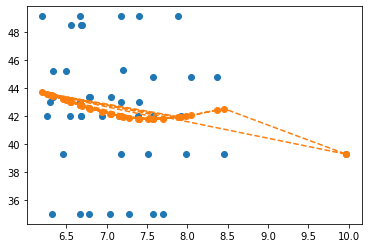

In [ ]:
plt.plot(x, y, 'o', x, y_corr1, 'o--')
sse = sum((y-y_corr1)**2)
tse = (len(y)-1)*np.var(y)
r2 = 1-sse/tse
print('Error cuadrático:', sse)
print('Varianza total:', tse)
print('r^2:', r2)
plt.show()

**Regresión polinomial por mínimos cuadrados para la aproximación de la fuerza de falla en diferentes ángulos de la herramienta**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import math
bd_tierrita = pd.read_excel(io = "/content/BaseDatos.xlsx", sheet_name="Hoja1")
print(bd_tierrita)

       Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4
0     Nevada Fine         NaN         NaN         NaN         NaN
1      Tool Angle      70.000      80.000      90.000     100.000
2   Failure Force       0.530       0.000       1.800       0.000
3             NaN       0.930       1.420       1.800       0.000
4             NaN       0.770       1.450       1.950       0.000
5             NaN       0.950       1.260       0.000       0.000
6             NaN       0.820       1.400       0.000       2.810
7             NaN       0.900       1.400       0.000       2.310
8             NaN       0.900       1.480       1.850       3.590
9             NaN       0.960       1.370       2.100       3.200
10            NaN       0.930       1.350       1.800       2.660
11            NaN       0.900       1.420       0.000       3.120
12            NaN       0.940       1.300       0.000       2.890
13            NaN       0.900       1.270       0.000       2.500
14        

In [ ]:
bd_tierrita.columns= ['a','b','c','d','e']
anglegraf = bd_tierrita.iloc[1,1:5]
meangraf= bd_tierrita.iloc[14, 1:5]
tablita= pd.concat([anglegraf, meangraf], axis=1)
tablita.columns=['Angle','Mean']
tablita

,Angle,Mean
b,70.0,0.89
c,80.0,1.37
d,90.0,1.88
e,100.0,2.89


In [ ]:
x= np.array([70,80,90,100]) #Ángulo 
y= np.array([0.89,1.37,1.88,2.89]) #Fuerza de falla

In [ ]:
poli= np.polyfit(x,y,3) #el número es el grado 
poli
#X= pendiente  Y= ordenada al origen

array([ 7.83333333e-05, -1.86500000e-02,  1.52166667e+00, -4.11100000e+01])

In [ ]:
y_cor= np.polyval(poli,x)
y_cor
#regresa los valores corregidos de y dependiendo de la ecuación

array([0.89, 1.37, 1.88, 2.89])

Error cuadrático: 2.5649528836373385e-26
Varianza total: 1.65020625
r^2: 1.0


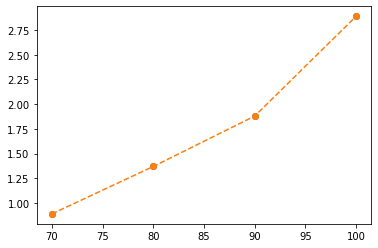

In [ ]:
plt.plot(x,y,'o',x,y_cor,'o--')


sse= sum((y-y_cor)**2) #Error cuadrático
tse= (len(y)-1)*np.var(y) #Varianza total
r2=1-sse/tse #obtenemos r^2 (valores de 0 a 1)
print("Error cuadrático:", sse)
print("Varianza total:", tse)
print("r^2:", r2) #Entre más cercana a 1, mayor certeza
plt.show()


In [ ]:
#Función para encontrar la fuerza neta en cualquier ángulo:

x= 78
f= 7.83333333e-05*x**3 -1.86500000e-02*x**2 +1.52166667e+00*x -4.11100000e+01
f

1.286640244181612